<a href="https://colab.research.google.com/github/celvinfahryan/demo-project-ds/blob/main/Credit_Risk_ID_X.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 0. Setup

In [ ]:
!pip install pandas

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, classification_report, confusion_matrix

# 1. Data Understanding



In [2]:
df = pd.read_csv('/content/drive/MyDrive/Final Task Rakamin/Data Scientist - ID X Partners/loan_data_2007_2014.csv', index_col=0)
df

<ipython-input-2-a92328604308>:1: DtypeWarning: Columns (20) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/content/drive/MyDrive/Final Task Rakamin/Data Scientist - ID X Partners/loan_data_2007_2014.csv', index_col=0)


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
0,1077501,1296599,5000,5000,4975.0,36 months,10.65,162.87,B,B2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,C,C4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96,84.33,C,C5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49,339.31,C,C1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69,67.79,B,B5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
466280,8598660,1440975,18400,18400,18400.0,60 months,14.47,432.64,C,C2,...,NaN,NaN,NaN,NaN,NaN,NaN,29900.0,NaN,NaN,NaN
466281,9684700,11536848,22000,22000,22000.0,60 months,19.97,582.50,D,D5,...,NaN,NaN,NaN,NaN,NaN,NaN,39400.0,NaN,NaN,NaN
466282,9584776,11436914,20700,20700,20700.0,60 months,16.99,514.34,D,D1,...,NaN,NaN,NaN,NaN,NaN,NaN,13100.0,NaN,NaN,NaN
466283,9604874,11457002,2000,2000,2000.0,36 months,7.90,62.59,A,A4,...,NaN,NaN,NaN,NaN,NaN,NaN,53100.0,NaN,NaN,NaN


In [3]:
df.describe(include='all')

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
count,4.662850e+05,4.662850e+05,466285.000000,466285.000000,466285.000000,466285,466285.000000,466285.000000,466285,466285,...,0.0,0.0,0.0,0.0,0.0,0.0,3.960090e+05,0.0,0.0,0.0
unique,NaN,NaN,NaN,NaN,NaN,2,NaN,NaN,7,35,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,NaN,NaN,36 months,NaN,NaN,B,B3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,NaN,NaN,337953,NaN,NaN,136929,31686,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,1.307973e+07,1.459766e+07,14317.277577,14291.801044,14222.329888,NaN,13.829236,432.061201,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,3.037909e+04,NaN,NaN,NaN
std,1.089371e+07,1.168237e+07,8286.509164,8274.371300,8297.637788,NaN,4.357587,243.485550,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,3.724713e+04,NaN,NaN,NaN
min,5.473400e+04,7.047300e+04,500.000000,500.000000,0.000000,NaN,5.420000,15.670000,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.000000e+00,NaN,NaN,NaN
25%,3.639987e+06,4.379705e+06,8000.000000,8000.000000,8000.000000,NaN,10.990000,256.690000,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1.350000e+04,NaN,NaN,NaN
50%,1.010790e+07,1.194108e+07,12000.000000,12000.000000,12000.000000,NaN,13.660000,379.890000,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,2.280000e+04,NaN,NaN,NaN
75%,2.073121e+07,2.300154e+07,20000.000000,20000.000000,19950.000000,NaN,16.490000,566.580000,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,3.790000e+04,NaN,NaN,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 466285 entries, 0 to 466284
Data columns (total 74 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   id                           466285 non-null  int64  
 1   member_id                    466285 non-null  int64  
 2   loan_amnt                    466285 non-null  int64  
 3   funded_amnt                  466285 non-null  int64  
 4   funded_amnt_inv              466285 non-null  float64
 5   term                         466285 non-null  object 
 6   int_rate                     466285 non-null  float64
 7   installment                  466285 non-null  float64
 8   grade                        466285 non-null  object 
 9   sub_grade                    466285 non-null  object 
 10  emp_title                    438697 non-null  object 
 11  emp_length                   445277 non-null  object 
 12  home_ownership               466285 non-null  object 
 13  annu

In [5]:
# Menjelajahi semua kolom dan mencetak distribusi nilai unik
for column in df.columns:
    if df[column].dtype == object:
        print(df[column].value_counts())
        print()

term
36 months    337953
60 months    128332
Name: count, dtype: int64

grade
B    136929
C    125293
D     76888
A     74867
E     35757
F     13229
G      3322
Name: count, dtype: int64

sub_grade
B3    31686
B4    30505
C1    26953
C2    26740
B2    26610
C3    25317
B5    25252
C4    24105
B1    22876
C5    22178
A5    21757
D1    19261
A4    19045
D2    17046
D3    14916
D4    14099
A3    12568
D5    11566
A2    10956
A1    10541
E1     9033
E2     8669
E3     6976
E4     5992
E5     5087
F1     3940
F2     3001
F3     2708
F4     2067
F5     1513
G1     1109
G2      823
G3      583
G4      422
G5      385
Name: count, dtype: int64

emp_title
Teacher                              5399
Manager                              4438
Registered Nurse                     2316
RN                                   2204
Supervisor                           1967
                                     ... 
The Eastern Arizona AHEC                1
Delaware Quarries.com                   1
McCauley

# 2. Exploratory Data Analysis (EDA)

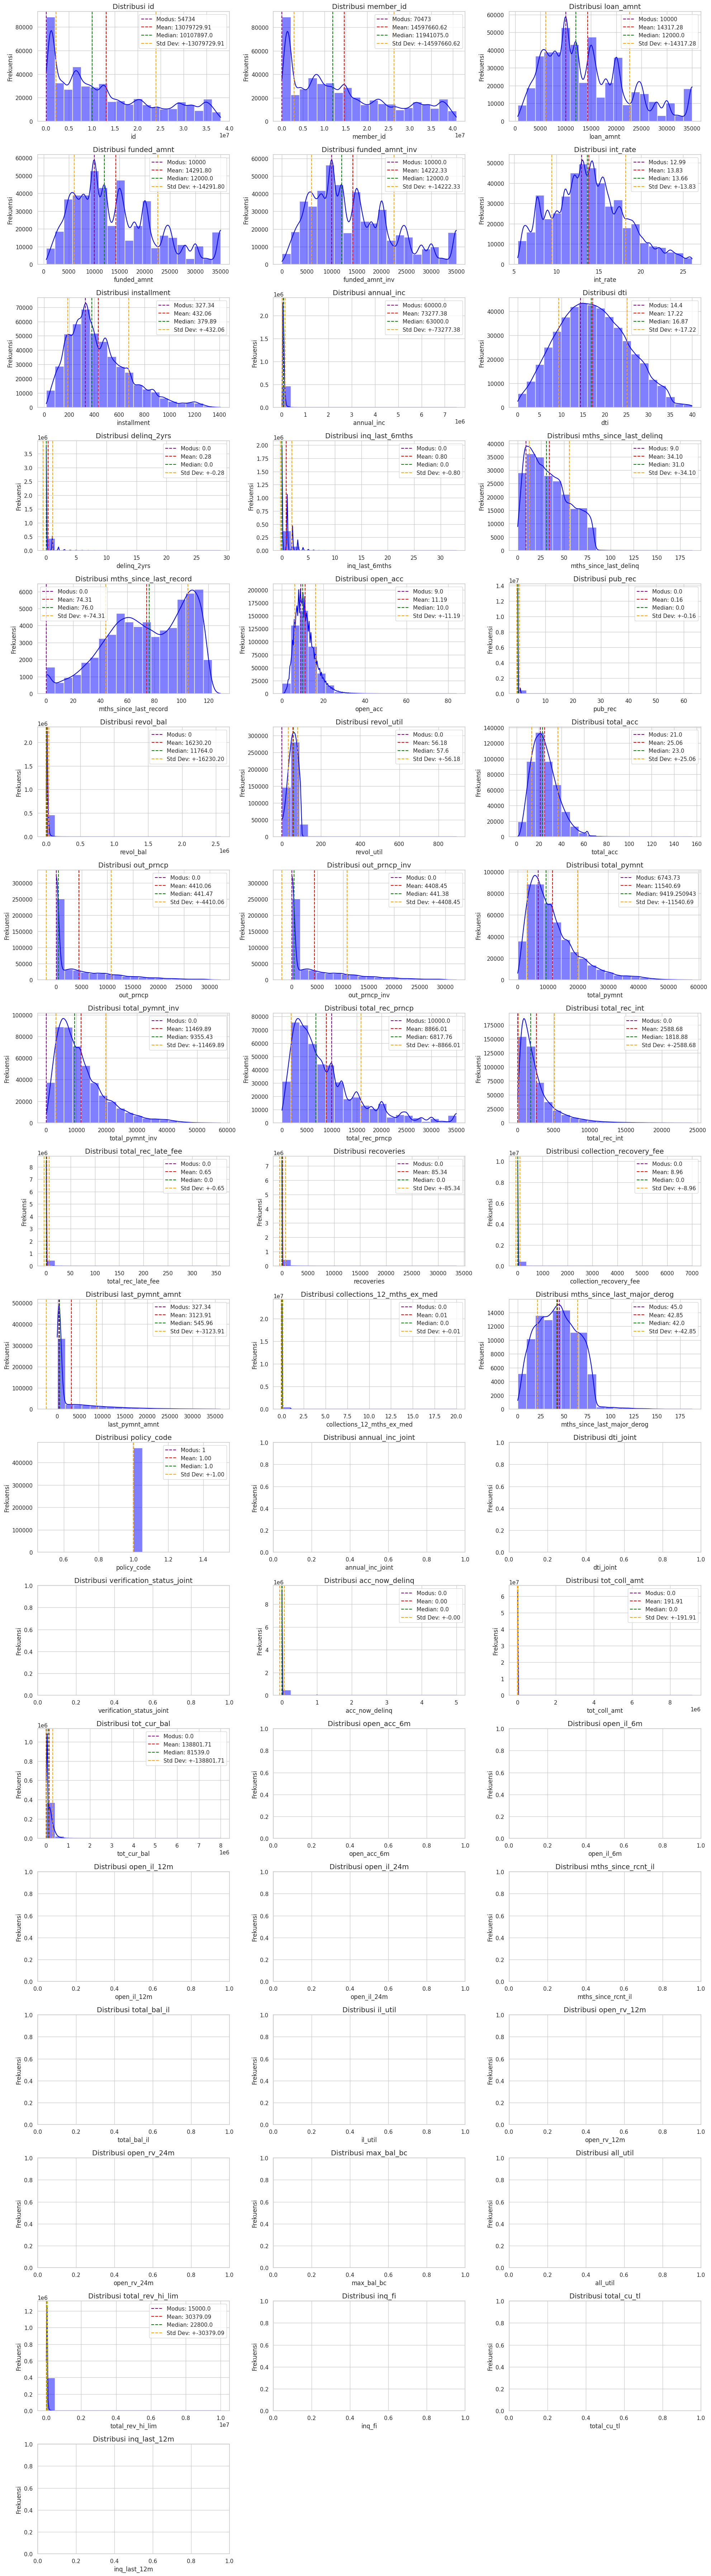

In [6]:
# Data Numerik
sns.set(style="whitegrid")
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns
num_plots = len(numerical_columns)
cols = 3
rows = num_plots // cols + (num_plots % cols > 0)
fig, axes = plt.subplots(rows, cols, figsize=(20, 4 * rows))
axes = axes.flatten()
for i, column in enumerate(numerical_columns):
    sns.histplot(df[column].dropna(), kde=True, bins=20, color='blue', ax=axes[i])
    axes[i].set_title(f'Distribusi {column}', fontsize=14)
    axes[i].set_xlabel(column, fontsize=12)
    axes[i].set_ylabel('Frekuensi', fontsize=12)

    #Menambahkan informasi statistik
    mean_value = df[column].mean()
    median_value = df[column].median()
    std_deviation = df[column].std()
    mode_values= df[column].mode()
    if not mode_values.empty:
      mode_value=mode_values.iloc[0]
      axes[i].axvline(mode_value, color='purple', linestyle='--', label=f'Modus: {mode_value}')
      axes[i].axvline(mean_value, color='red', linestyle='--', label=f'Mean: {mean_value:.2f}')
      axes[i].axvline(median_value, color='green', linestyle='--', label=f'Median: {median_value}')
      axes[i].axvline(mean_value + std_deviation, color='orange', linestyle='--', label=f'Std Dev: +-{mean_value:.2f}')
      axes[i].axvline(mean_value - std_deviation, color='orange', linestyle='--')
      axes[i].legend()

#Menghapus axes kosong
for j in range(i + 1, len(axes)):
  fig.delaxes (axes[j])

plt.tight_layout()
plt.savefig("distribusi_kolom_numerikal.png")
plt.show()

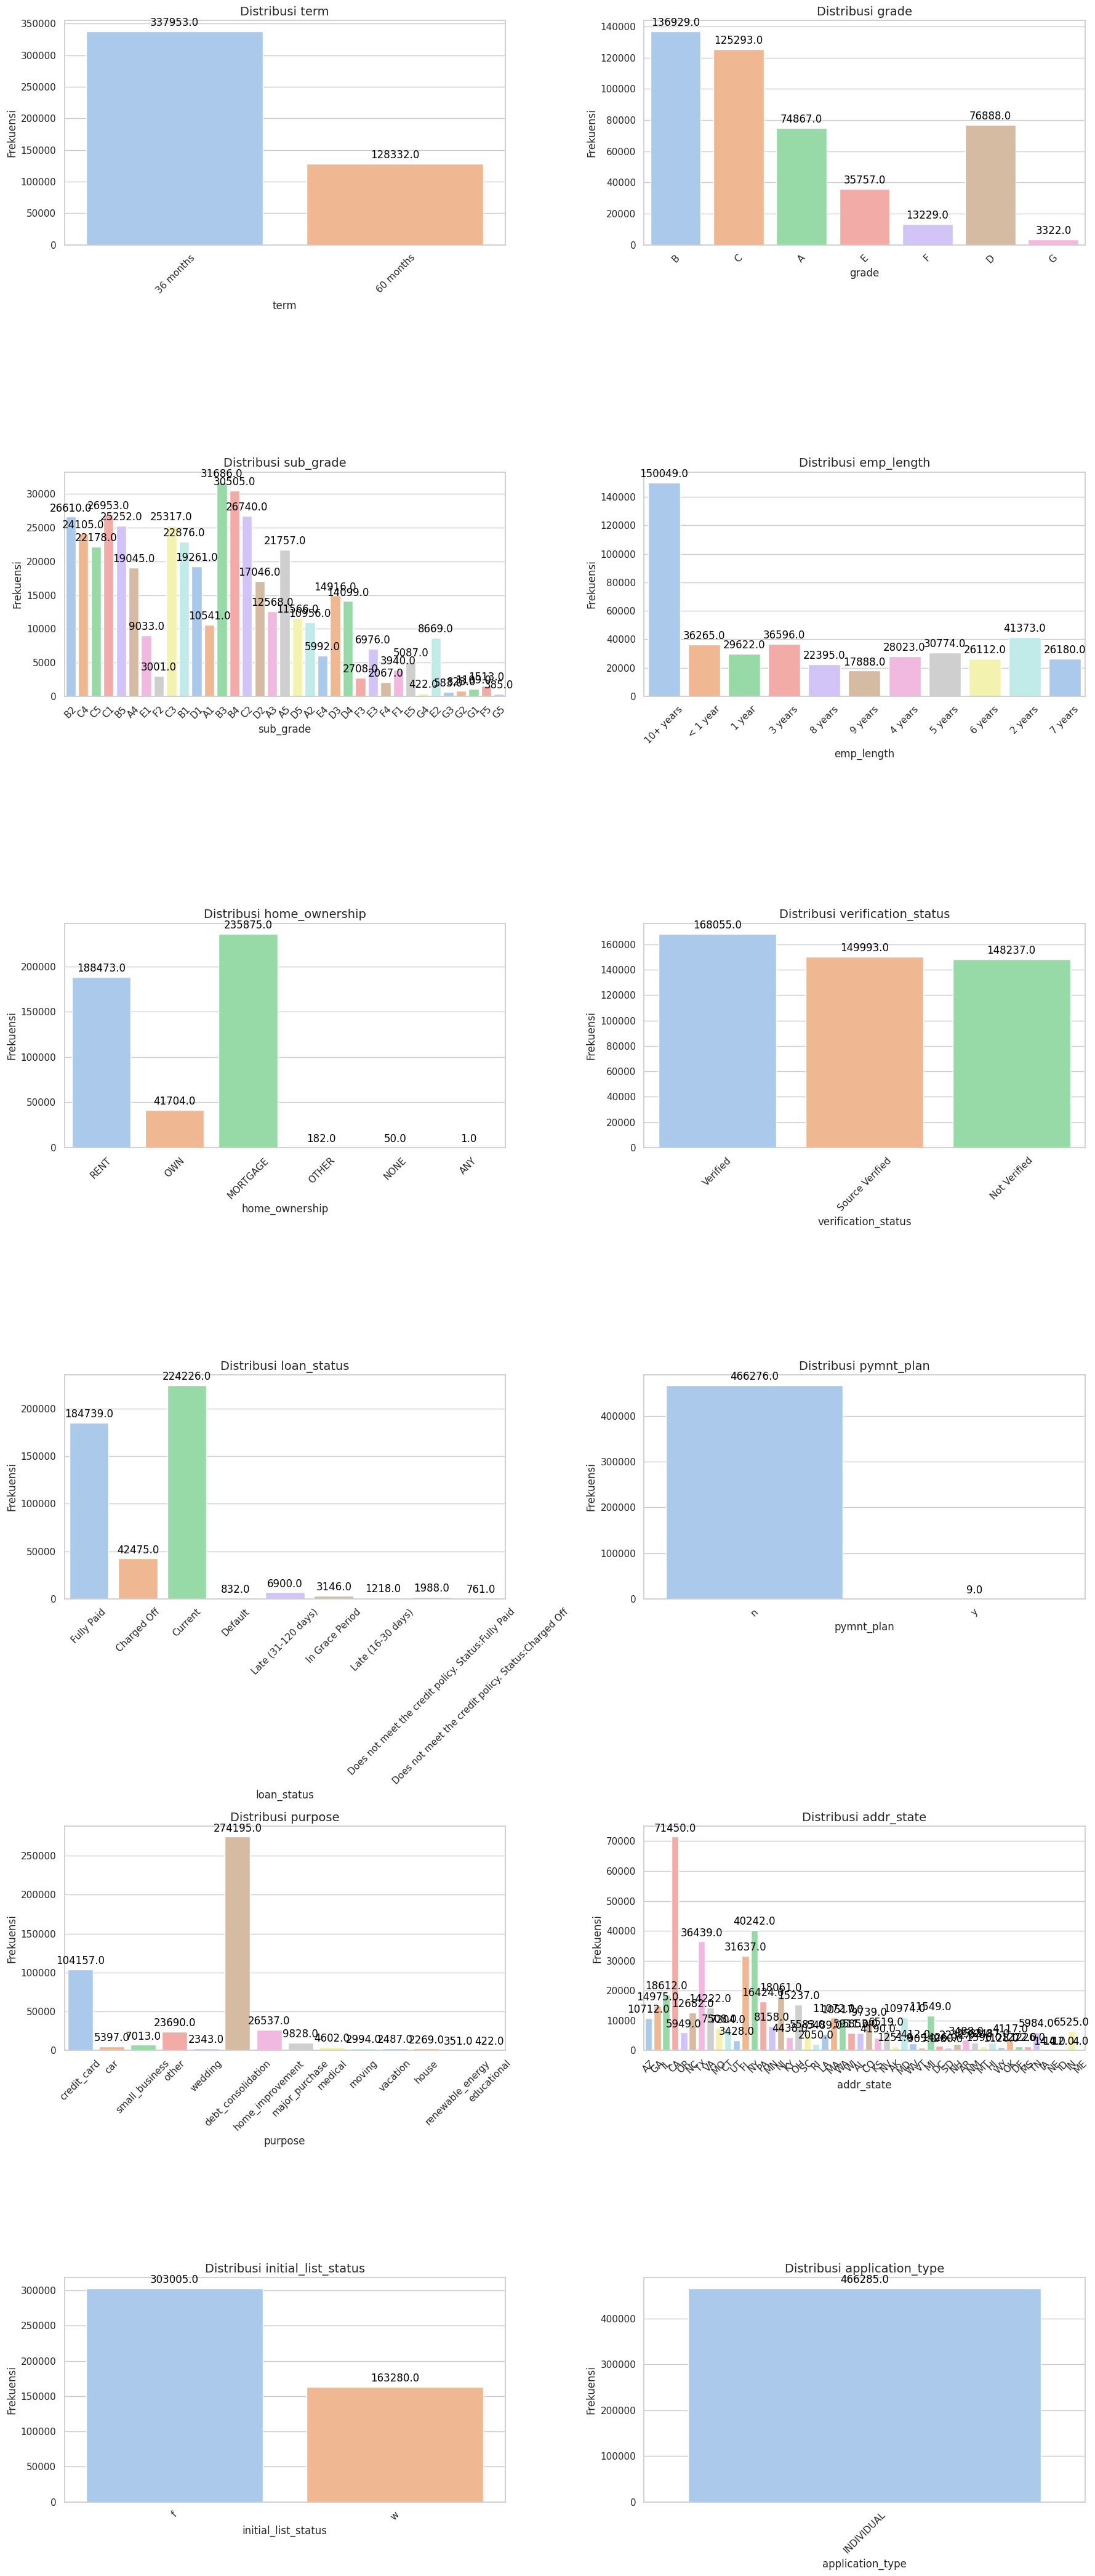

In [8]:
# Data Kategori
categorical_columns = df.select_dtypes(include=['object']).columns
categorical_columns = [col for col in categorical_columns if df[col].nunique() <= 50]

sns.set(style="whitegrid")

num_plots = len(categorical_columns)
cols = 2
rows = num_plots // cols + (num_plots % cols > 0)
fig, axes = plt.subplots(rows, cols, figsize=(18, 7 * rows))
axes = axes.flatten()

for i, column in enumerate(categorical_columns):
    sns.countplot(x=column, data=df, ax=axes[i], hue=column, palette='pastel', legend=False)
    axes[i].set_title(f'Distribusi {column}', fontsize=14)
    axes[i].set_xlabel(column, fontsize=12)
    axes[i].set_ylabel('Frekuensi', fontsize=12)
    axes[i].tick_params(axis='x', rotation=45)
    for p in axes[i].patches:
      axes[i].annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                       ha='center', va='center', fontsize=12, color='black', xytext=(0,10), textcoords='offset points')

#Menghapus axes kosong
for j in range(i + 1, len(axes)):
  fig.delaxes (axes[j])

plt.subplots_adjust(hspace=0.5, wspace=0.4)
plt.tight_layout()
plt.savefig("distribusi_kolom_categorical.png")
plt.show()

# 3. Data Preparation

In [9]:
#Mengecek apakah ada data duplikat atau tidak
df.duplicated().sum()

0

In [10]:
#Mengecek apakah ada data kosong atau tidak
df.isnull().sum()

,0
id,0
member_id,0
loan_amnt,0
funded_amnt,0
funded_amnt_inv,0
...,...
all_util,466285
total_rev_hi_lim,70276
inq_fi,466285
total_cu_tl,466285


In [11]:
#Menghapus kolom yang isinya kosong
df = df.dropna(axis=1, how='all')
df

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim
0,1077501,1296599,5000,5000,4975.0,36 months,10.65,162.87,B,B2,...,NaN,Jan-16,0.0,NaN,1,INDIVIDUAL,0.0,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,C,C4,...,NaN,Sep-13,0.0,NaN,1,INDIVIDUAL,0.0,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96,84.33,C,C5,...,NaN,Jan-16,0.0,NaN,1,INDIVIDUAL,0.0,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49,339.31,C,C1,...,NaN,Jan-15,0.0,NaN,1,INDIVIDUAL,0.0,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69,67.79,B,B5,...,Feb-16,Jan-16,0.0,NaN,1,INDIVIDUAL,0.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
466280,8598660,1440975,18400,18400,18400.0,60 months,14.47,432.64,C,C2,...,Feb-16,Jan-16,0.0,NaN,1,INDIVIDUAL,0.0,0.0,294998.0,29900.0
466281,9684700,11536848,22000,22000,22000.0,60 months,19.97,582.50,D,D5,...,NaN,Jan-16,0.0,NaN,1,INDIVIDUAL,0.0,0.0,221830.0,39400.0
466282,9584776,11436914,20700,20700,20700.0,60 months,16.99,514.34,D,D1,...,Feb-16,Dec-15,0.0,NaN,1,INDIVIDUAL,0.0,0.0,73598.0,13100.0
466283,9604874,11457002,2000,2000,2000.0,36 months,7.90,62.59,A,A4,...,NaN,Apr-15,0.0,NaN,1,INDIVIDUAL,0.0,0.0,591610.0,53100.0


In [22]:
#Mengecek apakah ada data kosong atau tidak
df.isnull().sum()

,0
id,0
member_id,0
loan_amnt,0
funded_amnt,0
funded_amnt_inv,0
term,0
int_rate,0
installment,0
grade,0
sub_grade,0


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 466285 entries, 0 to 466284
Data columns (total 57 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   id                           466285 non-null  int64  
 1   member_id                    466285 non-null  int64  
 2   loan_amnt                    466285 non-null  int64  
 3   funded_amnt                  466285 non-null  int64  
 4   funded_amnt_inv              466285 non-null  float64
 5   term                         466285 non-null  object 
 6   int_rate                     466285 non-null  float64
 7   installment                  466285 non-null  float64
 8   grade                        466285 non-null  object 
 9   sub_grade                    466285 non-null  object 
 10  emp_title                    438697 non-null  object 
 11  emp_length                   445277 non-null  object 
 12  home_ownership               466285 non-null  object 
 13  annu

In [13]:
# Imputasi nilai yang hilang dengan median untuk fitur numerik
for col in df.select_dtypes(include=['int64', 'float64']).columns:
    df[col] = df[col].fillna(df[col].median())

# Imputasi nilai yang hilang dengan modus untuk fitur kategorikal
for col in df.select_dtypes(include=['object']).columns:
    df[col] = df[col].fillna(df[col].mode()[0])

<ipython-input-13-92c9a06c33af>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = df[col].fillna(df[col].median())
<ipython-input-13-92c9a06c33af>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = df[col].fillna(df[col].mode()[0])


In [14]:
# Mendeteksi Outlier
def detect_outliers(df, columns):
    outliers = {}
    for col in columns :
      Q1 = df[col].quantile(0.25)
      Q3 = df[col].quantile(0.75)
      IQR = Q3 - Q1  # Interquartile Range

      lower_bound = Q1 - 1.5 * IQR
      upper_bound = Q3 + 1.5 * IQR

      outliers[col] = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    return outliers

# Check outlier pada numerik
numeric_columns = df.select_dtypes(include=['int64', 'float64']).columns
outliers = detect_outliers(df, numeric_columns)
outliers

# Menghapus Outlier
def remove_outliers(df, columns):
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
    return df

df_cleaned = remove_outliers(df, numeric_columns)
df_cleaned

# Mengganti outlier
def replace_outliers_iqr(df, columns):
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1

        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Mengganti outlier dengan batas bawah dan atas
        df.loc[df[col] < lower_bound, col] = lower_bound
        df.loc[df[col] > upper_bound, col] = upper_bound

    return df

df_transformed = replace_outliers_iqr(df, numeric_columns)
df_transformed
print("Outlier sudah diganti")


Outlier sudah diganti


In [15]:
# Pisahkan fitur dan target
# Mendefinisikan kolom numerik
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns
x = df[numerical_columns]  # Menentukan fitur numerik

# Menggunakan Label Encoding untuk kolom target 'Loan Status'
label_encoder = LabelEncoder()
df['loan_status'] = label_encoder.fit_transform(df['loan_status'])
y = df['loan_status']  # Menentukan target

# Inisialisasi StandardScaler
scaler = StandardScaler()

# Melakukan scaling pada fitur-fitur dalam X
x_scaled = scaler.fit_transform(x)

# Cek hasil transformasi
print("x_scaled shape:", x_scaled.shape)
print("y shape:", y.shape)

<ipython-input-15-051357d1dd76>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['loan_status'] = label_encoder.fit_transform(df['loan_status'])


x_scaled shape: (466285, 35)
y shape: (466285,)


In [16]:
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size=0.2, random_state=42)

In [19]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
x_resampled, y_resampled = smote.fit_resample(x, y)

# Cek kembali distribusi kelas
print(pd.Series(y_resampled).value_counts())

loan_status
5    224226
0    224226
1    224226
2    224226
8    224226
6    224226
7    224226
4    224226
3    224226
Name: count, dtype: int64


# 4. Data Modelling & Evaluation

In [20]:
# Menginisialisasi model yang digunakan
models = {
    'Logistic Regression': LogisticRegression(),
    'Random Forest': RandomForestClassifier(class_weight='balanced', random_state=42),
    'Gradient Boosting': GradientBoostingClassifier()
}

In [21]:
# Menyimpan hasil evaluasi model
results = []

# Melatih dan mengevaluasi beberapa model
for model_name, model in models.items():
    model.fit(x_train, y_train)  # Melatih model
    y_pred = model.predict(x_test)  # Memprediksi hasil pada data uji

    y_pred_proba = model.predict_proba(x_test)

    roc_auc = roc_auc_score(y_test, y_pred_proba, multi_class='ovr')

    # Menghitung akurasi
    accuracy = accuracy_score(y_test, y_pred)

    # Menghasilkan laporan klasifikasi
    report = classification_report(y_test, y_pred, output_dict=True)

    # Menyimpan hasil evaluasi ke dalam list
    results.append({
        "Model": model_name,
        "Accuracy": accuracy,
        "ROC-AUC": roc_auc,  # Menambahkan ROC-AUC
        "Precision": report["weighted avg"]["precision"],
        "Recall": report["weighted avg"]["recall"],
        "F1-Score": report["weighted avg"]["f1-score"]
    })

# Mengonversi hasil evaluasi ke dalam DataFrame Pandas
evaluation_df = pd.DataFrame(results)

# Menampilkan hasil evaluasi
print(evaluation_df)


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no pre

                 Model  Accuracy   ROC-AUC  Precision    Recall  F1-Score
0  Logistic Regression  0.961987  0.931050   0.945882  0.961987  0.947776
1        Random Forest  0.967895  0.916448   0.954607  0.967895  0.955314
2    Gradient Boosting  0.965096  0.921076   0.951775  0.965096  0.953807
